# Forecasting(CocaCola_Sales)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r"D:\Excelr\assignments\Forecasting\CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data.shape

(42, 2)

In [4]:
# We will extract Quarter values and Year values separately from 'Quarter column'
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

In [5]:
data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [6]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


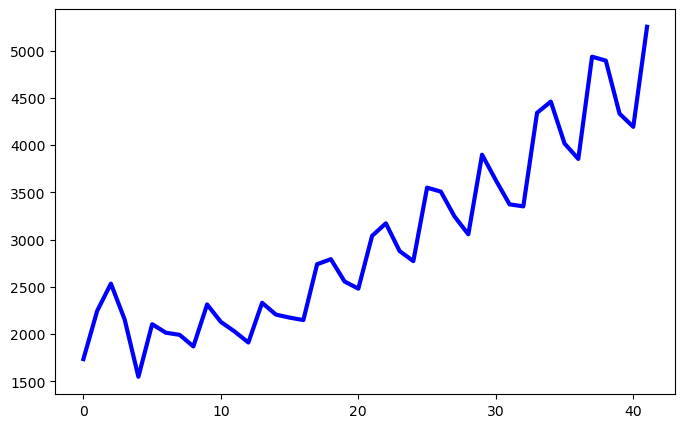

In [7]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(data['Sales'], color = 'blue', linewidth=3)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

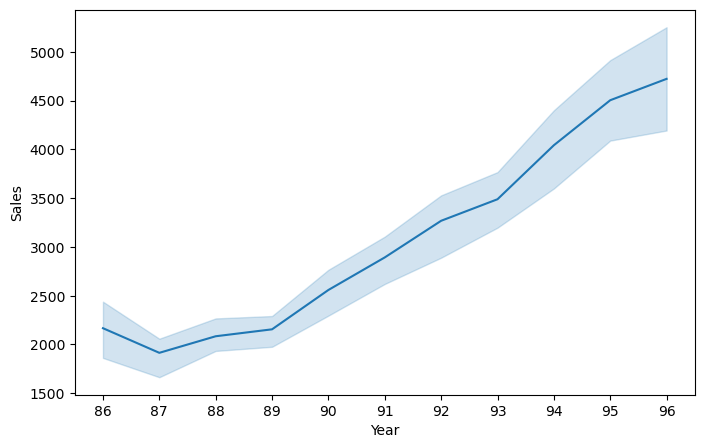

In [8]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data)

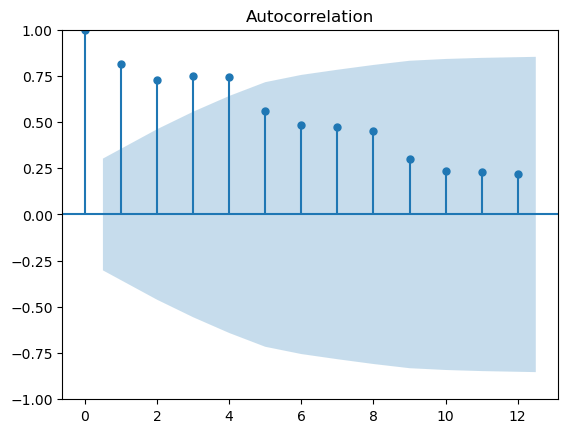

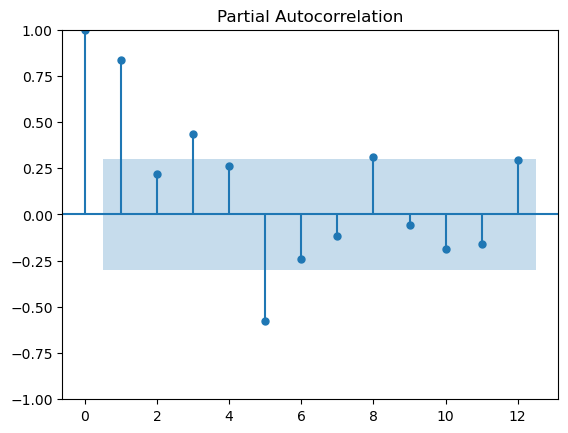

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

# Data Driven Forecasting Methods

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [11]:
#Splitting Data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

## Moving Average Method

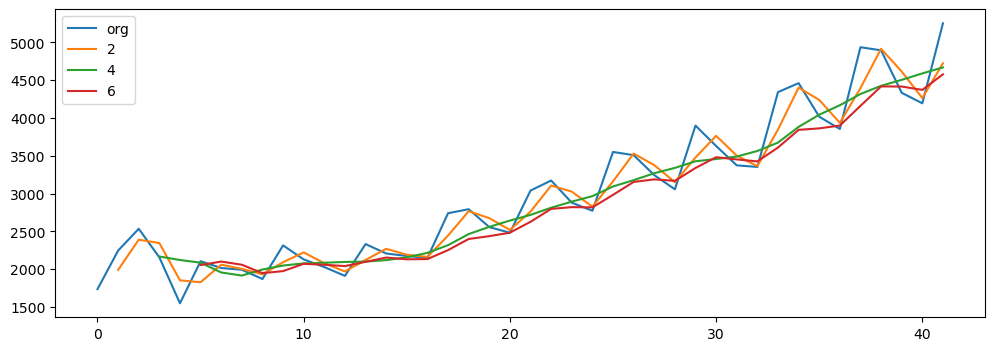

In [12]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

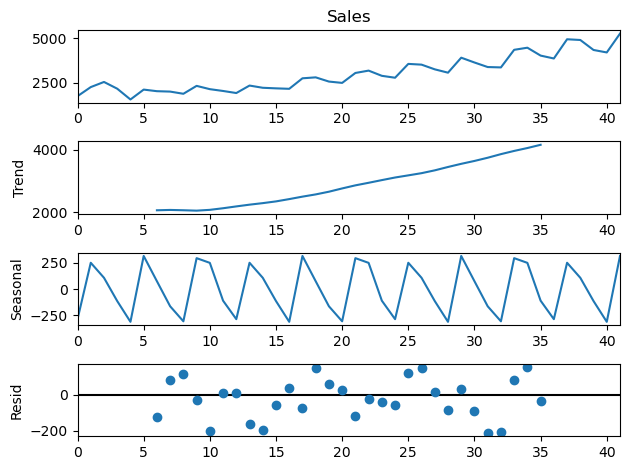

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## Evaluation Metric RMSE

In [14]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## Simple Exponential Method

In [15]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses = RMSE(Test.Sales, pred_ses)
rmse_ses

1034.935926527898

## Holt Method

In [16]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw = RMSE(Test.Sales, pred_hw)
rmse_hw

786.7664832816314

## Holts winter exponential smoothing with additive seasonality and additive trend

In [17]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add

610.227144270313

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [18]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_mul_add

569.0540408448411

## Model based Forecasting Methods

In [19]:
# Data preprocessing for models
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [20]:
#Splitting data into Train and Test
Train = data.head(32)
Test = data.tail(10)

In [21]:
Train.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [22]:
Test.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
32,Q1_94,3352.0,Q1,94,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867


## Splitting Data

In [23]:
# Splitting data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

## Linear Model

In [24]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767115

## Exponential Model

In [25]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_exp

590.3316432076576

## Quadratic Model

In [26]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_quad_model

457.73573554072897

## Additive Seasonality model

In [27]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858353

## Additive Seasonality Quadratic model

In [28]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad      

277.3510771128774

## Multiplicative Seasonality model

In [29]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.250394836116

## Multiplicative Addictive Seasonality Model 

In [30]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_add_sea = RMSE(Test['Sales'], np.exp(pred_Mul_add_sea))
rmse_Mul_add_sea

448.867818269187

In [31]:
list = [['Simple Exponential Method',rmse_ses], ['Holt method',rmse_hw],
          ['HW exp smoothing add',rmse_hwe_add_add],['HW exp smoothing mult',rmse_hwe_mul_add],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_exp],['Quad model',rmse_quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_quad],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_add_sea]]

In [32]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,1034.935927
1,Holt method,786.766483
2,HW exp smoothing add,610.227144
3,HW exp smoothing mult,569.054041
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


## Building final model with least RMSE value

In [33]:
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [34]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

159.0552257652247

In [35]:
pred_df = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709
